In [1]:
import gin
import copy
import numpy as np
import os


import torch as T
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, OrderedDict
import gym

C:\Users\areeb\anaconda3\envs\msc_test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\areeb\anaconda3\envs\msc_test\lib\site-packages\gym\envs\registration.py:424: UserWarning: WARN: Custom namespace `ALE` is being overridden by namespace `ALE`. If you are developing a plugin you shouldn't specify a namespace in `register` calls. The namespace is specified through the entry point package metadata.
  f"Custom namespace `{spec.namespace}` is being overridden "


In [2]:
-T.prod(T.Tensor([1 - -1])).item()

-2.0

In [2]:
new_var = np.zeros(shape=5*5, dtype=np.bool8)
print(id(new_var))
print(new_var)
print(id(copy.deepcopy(new_var)))
#np.random.choice()

2096786912624
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
2096912455312


In [3]:
T.tensor(np.random.uniform(1,10, size=(10,2)))

tensor([[5.5752, 9.5798],
        [5.3403, 1.8785],
        [6.1815, 7.7760],
        [5.1460, 9.6013],
        [6.0018, 1.0342],
        [5.3227, 4.4346],
        [6.5526, 1.2453],
        [7.1164, 7.6307],
        [4.0660, 3.2582],
        [1.8155, 7.8848]], dtype=torch.float64)

In [4]:
T.distributions.Normal(1,5).log_prob(T.tensor([[-5.8852, 8.522], [52.65,2.596]])).sum(1, keepdim=True)

tensor([[ -7.1365],
        [-58.4622]])

In [5]:
skill = np.array([1,2,3,4])#.reshape(1,-1)
obs = np.array([1,3,5,2]).reshape(1,-1)

print(skill.shape)
print(obs.shape)

T.tensor(skill, dtype=T.float32).mean().item()

(4,)
(1, 4)


2.5

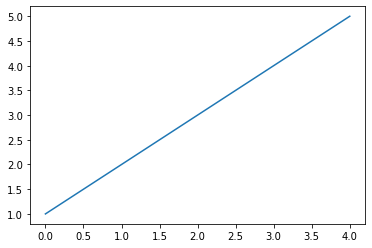

In [26]:
some_var_load

[1, 2, 3, 4, 5, 6, 7]

In [6]:
a = np.array([1,2,3], dtype=np.float32).reshape(1,3)
b = np.array([4,5,6], dtype=np.float32).reshape(1,3)
(a*b).mean().sum()

10.666667

In [7]:
-T.prod(T.Tensor(T.tensor(1).shape))#.item()

tensor(-1.4013e-45)

In [8]:
T.Tensor([1])

tensor([1.])

In [9]:
T.rand((10,3,5))[:,0,:].shape

torch.Size([10, 5])

In [10]:
import argparse
parser = argparse.ArgumentParser()
#parser.add_argument()

In [11]:
T.zeros(1).cuda()

RuntimeError: No CUDA GPUs are available

In [16]:
T.cuda.is_available()

False

In [26]:
from pathlib import Path
class testClass(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.c = a + b
        
        Path(self.c).mkdir(parents=True, exist_ok=True)
        
testClass(a="./test/", b="test")

In [27]:
np.ma.average(np.arange(1,100)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
class ClassOne(object):
    def __init__(self, a=1):
        self.a = a
        
    def mult(self, b):
        return self.a * b

class ClassTwo(ClassOne):
    def __init__(self, a):
        super(ClassTwo, self).__init__(a)
        
original_class = ClassOne()
new_class = ClassTwo(a=5)
print(original_class.a)
print(new_class.a)
print(new_class.mult(3))

1
5
15


In [6]:
T.distributions.normal.Normal(T.tensor([1,2,1,3,1], dtype=T.float32), T.tensor([1,2,2,2,2], dtype=T.float32)).rsample()

tensor([ 2.3897,  0.3079,  1.2403,  1.0650, -1.9986])

In [7]:
T.Tensor(10,3).sum(dim=1, keepdim=True)

tensor([[-1.4972e-26],
        [-5.3997e-22],
        [ 8.4078e-45],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 1.4013e-45],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00]])

In [8]:
F.mse_loss(T.rand((10,1)), T.rand((10,1))).pow(2)

tensor(0.0177)

In [9]:
#np.random.uniform(1, 100, 10) * 
a = np.power(np.full(10, 0.95), [i for i in range(10)]) * np.arange(100, 110)
print(a)

[100.          95.95        92.055       88.309625    84.70865
  81.24699844  77.91974041  74.72209068  71.64940658  68.69718566]


In [10]:
T.manual_seed(1)
T.rand((1,2))[:,1].unsqueeze(dim=1)#.reshape(10,-1).shape

tensor([[0.2793]])

In [35]:
T.cat([T.tensor(np.zeros([25,5])), T.tensor(np.ones([25,1]))], dim=1)

tensor([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.]], dtype=torch.float64)

In [12]:
a = np.zeros(shape=(10,5,3))
#a[0] = np.zeros(shape=(5,3)) + 2
a[0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [23]:
class fakeNet(nn.Module):
    def __init__(self):
        super(fakeNet, self).__init__()
        self.layer1 = nn.Linear(44, 256)
        self.layer2 = nn.Linear(256, 2)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return x
    
fake_model = fakeNet()

ans = fake_model.forward(T.Tensor(10,44))
print(ans.shape)
#print(ans1, ans2)
#print(ans.sum(1, keepdim=True).shape)

torch.Size([10, 2])


In [31]:
np.full(np.ones((10,1)).shape, 5).shape

(10, 1)

In [33]:
T.distributions.categorical.Categorical()

SyntaxError: invalid syntax (3147975202.py, line 1)

In [56]:
F.mse_loss(T.ones(5,6)*6, T.ones(5,6), reduction="mean")

tensor(25.)

In [173]:
a = T.tensor(np.random.choice(20, (5,3,2)))
b = T.ones((5,3,1), dtype=bool)
print(a.shape)
for i in range(3):
    print(a[:,i,:])
    print(a[:,i,:][b[:,i,:].view(-1)])

torch.Size([5, 3, 2])
tensor([[ 4, 11],
        [17, 14],
        [16, 14],
        [12, 10],
        [16,  9]], dtype=torch.int32)
tensor([[ 4, 11],
        [17, 14],
        [16, 14],
        [12, 10],
        [16,  9]], dtype=torch.int32)
tensor([[ 0, 19],
        [14,  1],
        [11, 14],
        [19,  7],
        [10,  2]], dtype=torch.int32)
tensor([[ 0, 19],
        [14,  1],
        [11, 14],
        [19,  7],
        [10,  2]], dtype=torch.int32)
tensor([[ 1, 19],
        [11, 19],
        [ 7, 17],
        [15,  9],
        [13, 15]], dtype=torch.int32)
tensor([[ 1, 19],
        [11, 19],
        [ 7, 17],
        [15,  9],
        [13, 15]], dtype=torch.int32)


In [135]:
a = T.rand(10,3, requires_grad=True)
a.data[a.data.eq(0)] = 55
a

tensor([[0.3399, 0.9090, 0.3230],
        [0.0613, 0.7501, 0.4535],
        [0.7158, 0.0560, 0.5530],
        [0.2295, 0.6185, 0.8744],
        [0.4871, 0.5314, 0.2471],
        [0.1565, 0.0626, 0.7497],
        [0.8942, 0.9196, 0.2524],
        [0.2747, 0.5980, 0.3266],
        [0.1742, 0.9255, 0.4540],
        [0.2809, 0.8862, 0.2043]], requires_grad=True)

In [32]:
T.manual_seed(1)
probs = T.distributions.normal.Normal(T.rand(1,17)*5, T.clamp(T.rand(1,17)*3, 10**-4, 2))
print("probs:", probs)

acts = probs.sample()
print("acts:", acts)
log_prob = probs.log_prob(acts)
print("log_prob:", log_prob)
log_prob.sum(1, keepdim=True)
# Why is probability missing from the compute_loss func??

probs: Normal(loc: torch.Size([1, 17]), scale: torch.Size([1, 17]))
acts: tensor([[ 4.0239,  0.5225,  3.5152,  4.0891,  0.8386,  6.5157,  2.1692,  3.2375,
          0.0130,  0.9046,  6.2719,  2.5940, -3.2492,  0.0905,  4.5524,  2.8712,
          2.8770]])
log_prob: tensor([[-1.3328, -1.7076, -1.8861, -0.9560, -1.0769, -3.1718, -0.7831, -1.0755,
         -2.9972, -1.8199, -2.7967,  2.0940, -7.1604, -1.8504, -2.2363, -1.6565,
          1.0902]])


tensor([[-29.3231]])

In [186]:
0.9999**100000

4.537723395901116e-05

In [37]:
new_dtype = str
isinstance(new_dtype, str)

False

In [39]:
getattr(T, "int32")

torch.int32

In [10]:
from enum import Enum
new_var = Enum("hello", ["a","b","c"])
new_var.c

<hello.c: 3>

In [16]:
def new_func(x:int=10, y:float=11.0):
    return x*y
help(new_func)

Help on function new_func in module __main__:

new_func(x: int = 10, y: float = 11.0)



In [42]:
from collections import namedtuple
new_var = namedtuple('new_var', "x y")
another_var = new_var(10,12)
#another_var = hello
another_var._asdict()
#another_var = hello(11, 10)

OrderedDict([('x', 10), ('y', 12)])

In [22]:
class fakeNet(nn.Module):
    def __init__(self):
        super(fakeNet, self).__init__()
        self.layer1 = nn.Linear(3, 10)
        self.layer2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = nn.ReLU(self.layer1(x))
        x = nn.ReLU(self.layer2(x))
        return x
    
fake_model = fakeNet()

In [10]:
def _get_optimizer_params(optimizer: T.optim.Optimizer):
    return sum([g['params'] for g in optimizer.param_groups], [])

_get_optimizer_params(T.optim.Adam(fake_model.parameters()))

[Parameter containing:
 tensor([[ 0.5463,  0.5572, -0.4750],
         [ 0.1517,  0.4329, -0.1134],
         [ 0.1629,  0.5508,  0.3456],
         [ 0.2774,  0.0799, -0.1599],
         [-0.5589,  0.1509,  0.1222],
         [ 0.0269, -0.2055, -0.3084],
         [ 0.2345, -0.0148, -0.1097],
         [ 0.3132,  0.5123, -0.0122],
         [-0.0155,  0.5194, -0.4481],
         [ 0.1953, -0.5506, -0.2500]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5165, -0.4564, -0.4033,  0.4208,  0.1573, -0.1503,  0.2932, -0.2530,
         -0.0411, -0.4838], requires_grad=True),
 Parameter containing:
 tensor([[-0.3120,  0.0443, -0.0293,  0.2144,  0.1787,  0.1972,  0.1258, -0.2935,
          -0.2201, -0.0204]], requires_grad=True),
 Parameter containing:
 tensor([-0.0843], requires_grad=True)]

In [ ]:
help()